# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Image loaded successfully from URL.


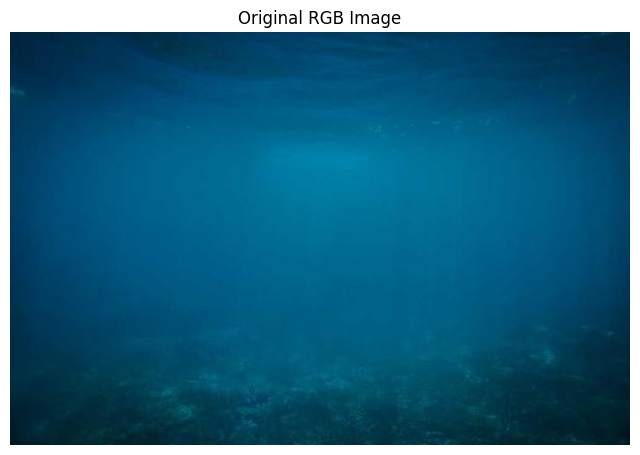

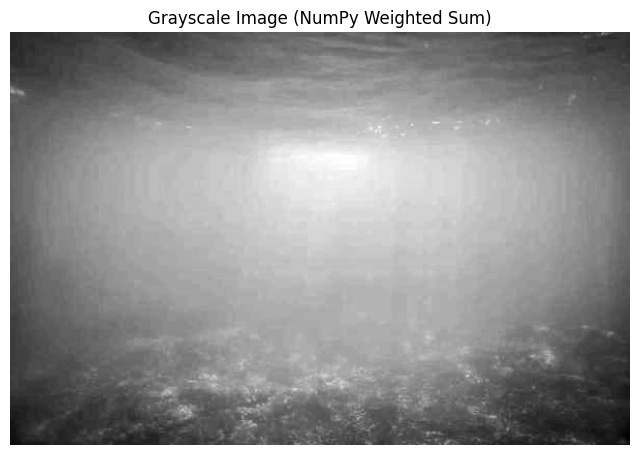

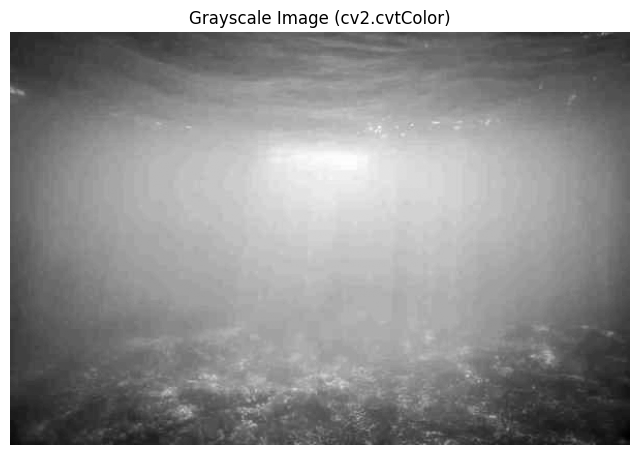

Maximum absolute difference between NumPy and cv2 Grayscale: 1.00
Mean absolute difference between NumPy and cv2 Grayscale: 0.47

 Array Shapes 
RGB Image Shape: (400, 600, 3) (Height, Width, Channels)
NumPy Grayscale Image Shape: (400, 600) (Height, Width)
cv2 Grayscale Image Shape: (400, 600) (Height, Width)

 - Pixel Values (Top-Left Corner) -
RGB Pixel at (10, 10): [ 1 38 64]
NumPy Grayscale Pixel at (10, 10): 29
cv2 Grayscale Pixel at (10, 10): 30


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import requests
from io import BytesIO

IMAGE_URL = "https://picsum.photos/600/400?random=1" # Using a publicly accessible image URL (e.g., from picsum.photos)

# --- Image Loading Function ---
def load_image_from_url(url):
    """Loads an image from a URL."""
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return np.array(img)

# Loading  Image
try:
    img_rgb_np = load_image_from_url(IMAGE_URL)
    print("Image loaded successfully from URL.")
except Exception as e:
    print(f"Error loading image: {e}")
    # Fallback/Dummy array if loading fails
    img_rgb_np = np.zeros((100, 100, 3), dtype=np.uint8)# img_rgb_np is the NumPy array of the loaded RGB image

# 1. Display it in RGB
# Ensure `display_image` function (from cell dcb975cd) is run before this cell.
display_image(img_rgb_np, "Original RGB Image")

# 2. Converting it to grayscale using NumPy (Weighted Sum Formula)
# Formula: Y' = 0.2989 * R + 0.5870 * G + 0.1140 * B (Common ITU-R BT.601 luminance coefficients)
img_rgb_float = img_rgb_np.astype(np.float32) / 255.0

# Separating channels (R=0, G=1, B=2)
R, G, B = img_rgb_float[:, :, 0], img_rgb_float[:, :, 1], img_rgb_float[:, :, 2]

# Applying the weighted sum formula
img_gray_np = (0.2989 * R + 0.5870 * G + 0.1140 * B)

# Converting it back to uint8 for display (optional, but good practice)
img_gray_np_display = (img_gray_np * 255).astype(np.uint8)
display_image(img_gray_np_display, "Grayscale Image (NumPy Weighted Sum)", is_gray=True)

# 3. Using the cvtColor function to do the same and compare results
img_gray_cv = cv2.cvtColor(img_rgb_np, cv2.COLOR_RGB2GRAY)
display_image(img_gray_cv, "Grayscale Image (cv2.cvtColor)", is_gray=True)

# Comparison
diff = np.abs(img_gray_np_display.astype(np.float32) - img_gray_cv.astype(np.float32))
print(f"Maximum absolute difference between NumPy and cv2 Grayscale: {np.max(diff):.2f}")
print(f"Mean absolute difference between NumPy and cv2 Grayscale: {np.mean(diff):.2f}")

# 4. Print the array shapes of both the RGB and grayscale images
print("\n Array Shapes ")
print(f"RGB Image Shape: {img_rgb_np.shape} (Height, Width, Channels)")
print(f"NumPy Grayscale Image Shape: {img_gray_np_display.shape} (Height, Width)")
print(f"cv2 Grayscale Image Shape: {img_gray_cv.shape} (Height, Width)")

# 5. Print a few pixel values of both
print("\n - Pixel Values (Top-Left Corner) -")
# RGB pixel (R, G, B)
print(f"RGB Pixel at (10, 10): {img_rgb_np[10, 10]}")
# Grayscale pixel
print(f"NumPy Grayscale Pixel at (10, 10): {img_gray_np_display[10, 10]}")
print(f"cv2 Grayscale Pixel at (10, 10): {img_gray_cv[10, 10]}")

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

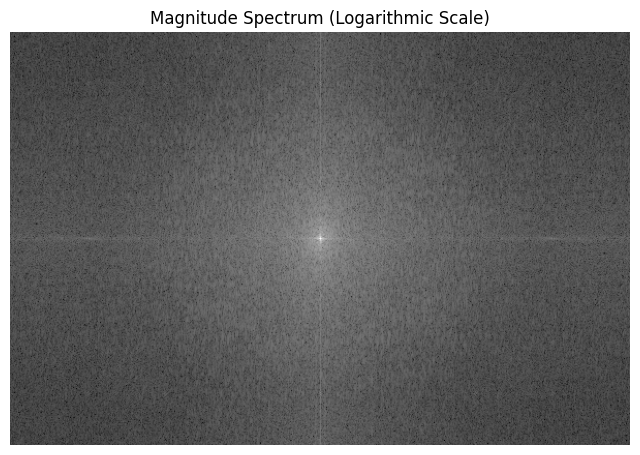

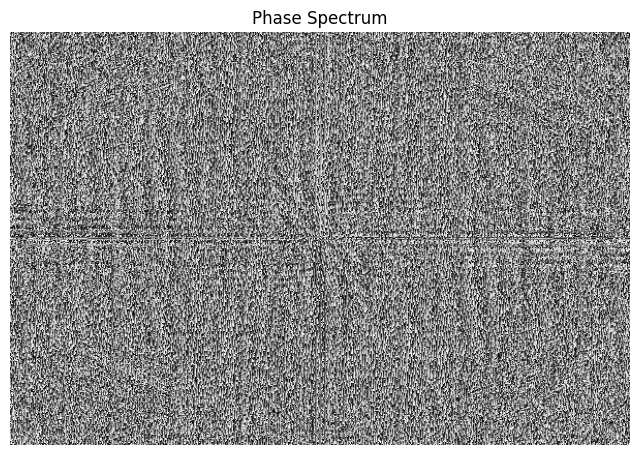

In [ ]:
# Part B: Compute FFT and Display Magnitude Spectrum

# Converting the uint8 image to float for accurate FFT computation
img_gray_float = img_gray_cv.astype(np.float64)

# B1. Compute the FFT of the grayscale image
# 1. np.fft.fft2: It is done to compute the 2D Discrete Fourier Transform (DFT)
f = np.fft.fft2(img_gray_float)

# 2 & 3. np.fft.fftshift: Shifts the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)# Storing it as fshift

# B2. Compute magnitude, phase and display Magnitude Spectrum

# Compute Magnitude Spectrum:
magnitude_spectrum = np.abs(fshift)

# Compute Phase Spectrum:
phase_spectrum = np.angle(fshift)

# Display Magnitude Spectrum
# We use a logarithm (np.log) for visualization because the magnitude values
magnitude_display = 20 * np.log(magnitude_spectrum + 1e-6) # Added small epsilon to avoid log(0)

# Displaying magnitude and phase spectrum
display_image(magnitude_display, "Magnitude Spectrum (Logarithmic Scale)", is_gray=True)
display_image(phase_spectrum, "Phase Spectrum", is_gray=True)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

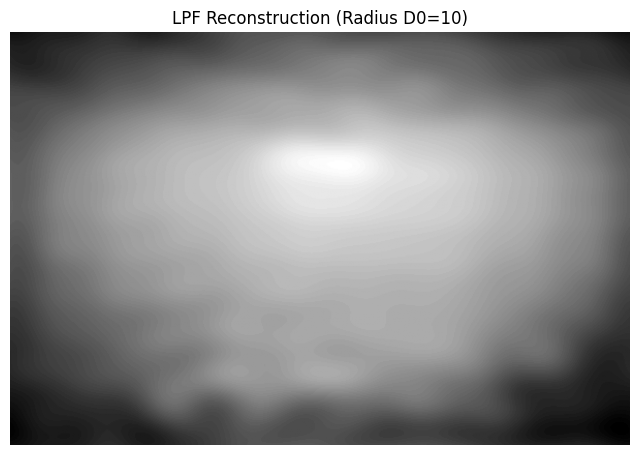

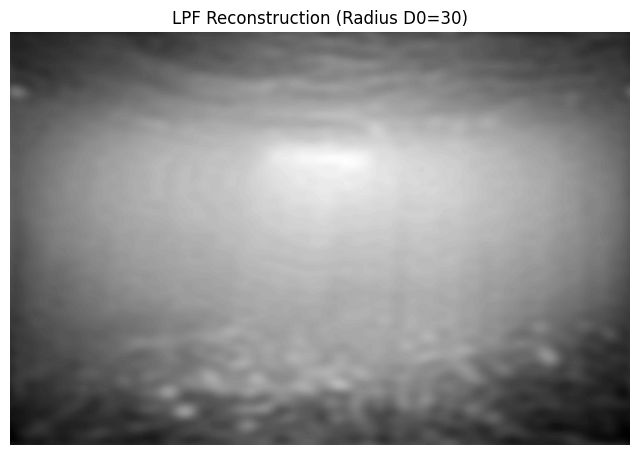

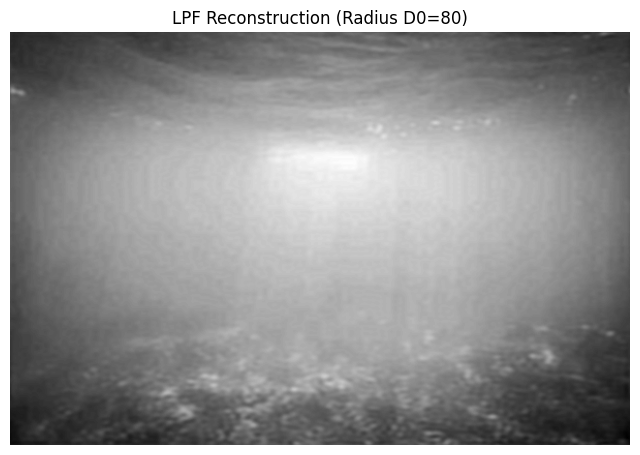

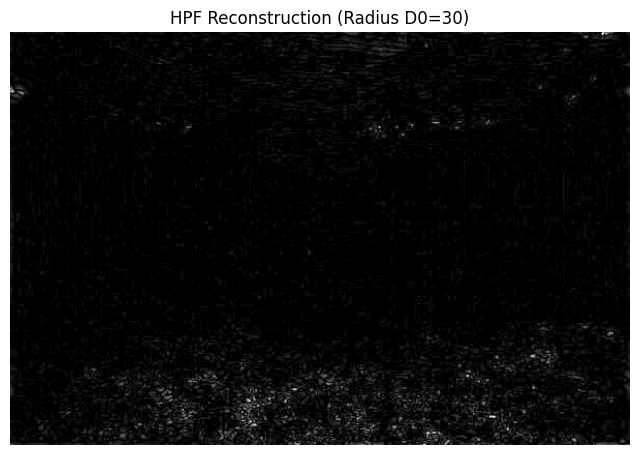

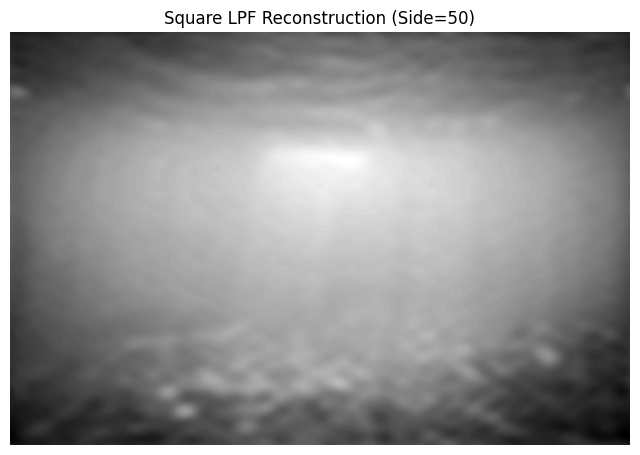

In [ ]:
# Part C1: Create 3 LPF masks of radii 10,30,80

M, N = img_gray_float.shape # Height, Width of the image stored

# Creating a coordinate grid(u,v)
u = np.arange(M)
v = np.arange(N)

# Calculate the center of the spectrum
center_u = M // 2
center_v = N // 2

# Calculate squared distance from the center for each point (u, v)
# Reshape (u - center_u) to a column vector (M, 1) and (v - center_v) to a row vector (1, N)
D_sq = (u - center_u)[:, np.newaxis]**2 + (v - center_v)[np.newaxis, :]**2

# Define radii for the LPF filters
radii = [10, 30, 80] # In pixels, Radius 10 is very small, 80 is larger.

# Store results for comparison
filtered_images_lpf = {}

for D0 in radii:
    # Create the Ideal LPF mask (1 if distance <= D0, 0 otherwise)
    mask_lpf = (np.sqrt(D_sq) <= D0).astype(np.float64)

    # Apply to fshift:
    fshift_filtered = fshift * mask_lpf

    # Reconstruct:
    f_filtered = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_filtered)

    # Take the real part and scale to [0, 255]
    img_reconstructed = np.abs(img_filtered)
    img_reconstructed = np.clip(img_reconstructed, 0, 255).astype(np.uint8)

    filtered_images_lpf[D0] = img_reconstructed
    display_image(img_reconstructed, f"LPF Reconstruction (Radius D0={D0})", is_gray=True)
    # Thus blur level increases as radius decreases .This is because a smaller radius (D0) means a smaller region of the frequency spectrum
    # is preserved, i.e., more high-frequency components are removed. High frequencies
    # correspond to sharp edges and fine details (structure). Removing more high
    # frequencies leads to **increased blurring** (smoothness) in the spatial domain.

    # Image showing a donut-shaped area on a Fourier spectrum to represent an HPF mask
# Part C2: Create HPF mask

# We can reuse the mask generation from C1
D0_hpf = 30 # Use a medium radius for demonstration

# Create the Ideal HPF mask (0 if distance <= D0, 1 otherwise)
mask_hpf = (np.sqrt(D_sq) > D0_hpf).astype(np.float64) # This is simply the inverse of LPF mask

# Apply to fshift
fshift_hpf_filtered = fshift * mask_hpf

# Reconstruct
f_hpf_filtered = np.fft.ifftshift(fshift_hpf_filtered)
img_hpf_filtered = np.fft.ifft2(f_hpf_filtered)

# Take the real part and scale to [0, 255]
img_hpf_reconstructed = np.abs(img_hpf_filtered)
img_hpf_reconstructed = np.clip(img_hpf_reconstructed, 0, 255).astype(np.uint8)

display_image(img_hpf_reconstructed, f"HPF Reconstruction (Radius D0={D0_hpf})", is_gray=True)

# Part C3: Create a square LPF mask

side = 50 # Side of the square filter in pixels
half_side = side // 2

# Initialize an all-zero mask
mask_sq_lpf = np.zeros((M, N), dtype=np.float64)

# Calculate the bounds for the square (relative to the center)
# The square will be centered at (center_u, center_v)
u_start = center_u - half_side
u_end = center_u + half_side
v_start = center_v - half_side
v_end = center_v + half_side

# Set the central square to 1,ensure indices are within bounds
mask_sq_lpf[u_start:u_end, v_start:v_end] = 1.0

# Apply to fshift
fshift_sq_lpf_filtered = fshift * mask_sq_lpf

# Reconstruct
f_sq_lpf_filtered = np.fft.ifftshift(fshift_sq_lpf_filtered)
img_sq_lpf_filtered = np.fft.ifft2(f_sq_lpf_filtered)

# Take the real part and scale to [0, 255]
img_sq_lpf_reconstructed = np.abs(img_sq_lpf_filtered)
img_sq_lpf_reconstructed = np.clip(img_sq_lpf_reconstructed, 0, 255).astype(np.uint8)

display_image(img_sq_lpf_reconstructed, f"Square LPF Reconstruction (Side={side})", is_gray=True)

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

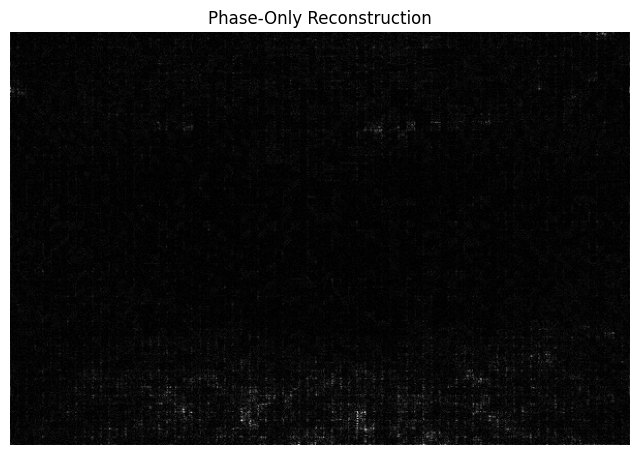

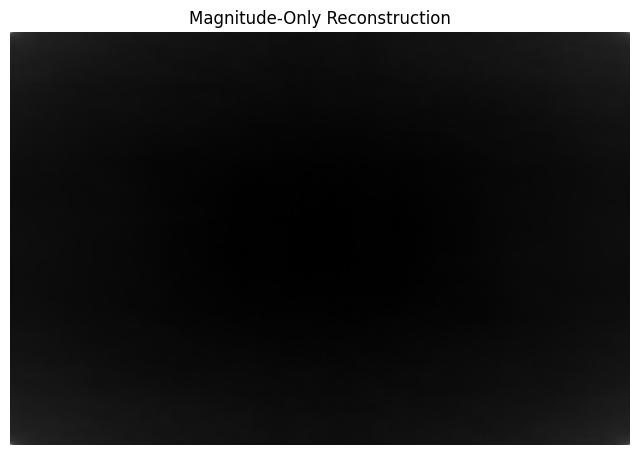

In [ ]:
# D1. Phase-only reconstruction
# Phase-only representation (Complex numbers with magnitude 1)
phase_only = fshift / np.abs(fshift)

# Reconstruct
f_phase_only = np.fft.ifftshift(phase_only)
img_phase_only = np.fft.ifft2(f_phase_only)
img_phase_only_reconstructed = np.abs(img_phase_only)

# Normalize and display
img_phase_only_reconstructed = (img_phase_only_reconstructed - img_phase_only_reconstructed.min()) / \
                               (img_phase_only_reconstructed.max() - img_phase_only_reconstructed.min()) * 255
img_phase_only_reconstructed = img_phase_only_reconstructed.astype(np.uint8)

display_image(img_phase_only_reconstructed, "Phase-Only Reconstruction", is_gray=True)

# Comparison with lecture's np.angle(f_shift)
# The line `phase_only = fshift / np.abs(fshift)` calculates the complex number
# $e^{i \cdot \phi}$ where $\phi$ is the phase angle. This is the **normalized complex number**
# with unit magnitude and the original phase.
# The lecture line `np.angle(f_shift)` simply returns the **phase angle** $\phi$ in radians,
# which is a real-valued array.
# To reconstruct from just the phase angle $\phi$ (i.e., treating $\phi$ as the complex number),
# you would effectively be calculating $F_{bad} = \phi + i \cdot 0$. This is fundamentally wrong,
# as the FFT requires a complex input with magnitude and phase information to reconstruct properly.

# Reconstruction from np.angle(f_shift)
f_angle = np.fft.ifftshift(phase_spectrum) # Using the real-valued phase angle array
img_angle = np.fft.ifft2(f_angle)
img_angle_reconstructed = np.abs(img_angle)

# Output explanation
# Reconstruction from `np.angle(f_shift)` (the phase angle in radians) results in a highly
# distorted and noisy image. This is because the inverse FFT expects complex numbers
# F(u,v) = |F(u,v)|e^{i\phi(u,v)}. By passing only the phase angle phi as the
# complex input (i.e., assuming the imaginary part is zero, F = phi + i0), we are providing
# incorrect magnitude and phase information, leading to a meaningless output.

# D2. Magnitude-only reconstruction
# Magnitude-only representation
mag_only = np.abs(fshift) # This is the magnitude array

# To make this a valid complex FFT input with zero phase:
mag_only_complex = mag_only.astype(np.complex128) # Complex numbers with Im=0

# Reconstruct
f_mag_only = np.fft.ifftshift(mag_only_complex)
img_mag_only = np.fft.ifft2(f_mag_only)
img_mag_only_reconstructed = np.abs(img_mag_only)

# Normalize and display
img_mag_only_reconstructed = (img_mag_only_reconstructed - img_mag_only_reconstructed.min()) / \
                             (img_mag_only_reconstructed.max() - img_mag_only_reconstructed.min()) * 255
img_mag_only_reconstructed = img_mag_only_reconstructed.astype(np.uint8)

display_image(img_mag_only_reconstructed, "Magnitude-Only Reconstruction", is_gray=True)

# Guess for Logarithm in magnitude spectrum:
#  As mentioned in Part B, the magnitude values span a huge dynamic range.
# Taking the logarithm (i.e., `20 * np.log(magnitude_spectrum)`) compresses this range
# so that low-energy (high-frequency) components, which contain important visual details,
# become visible in the display.
# Difference in Appearance: The Magnitude Spectrum image in Part B was the logarithm of the
# magnitude array *for visualization*. The Magnitude-Only Reconstruction image in Part D is the
# spatial domain result of an inverse FFT using the magnitude array (without the log) and
# zero phase. The appearance is different because one is a log-transformed frequency domain image, and the other is a non-log-transformed *spatial domain* image (the actual image).
# The spatial domain result shows a blurred, blob-like image, confirming that phase information
# is crucial for structure, while magnitude contributes to the overall texture/energy.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

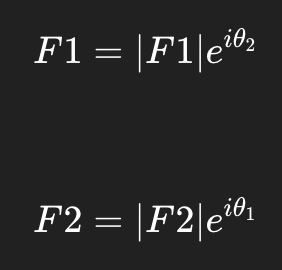

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

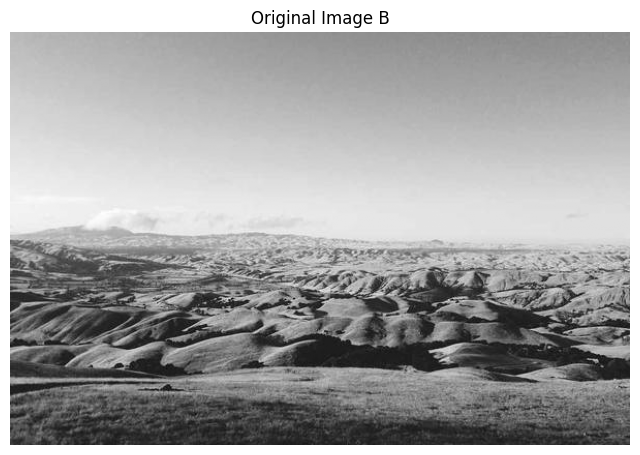

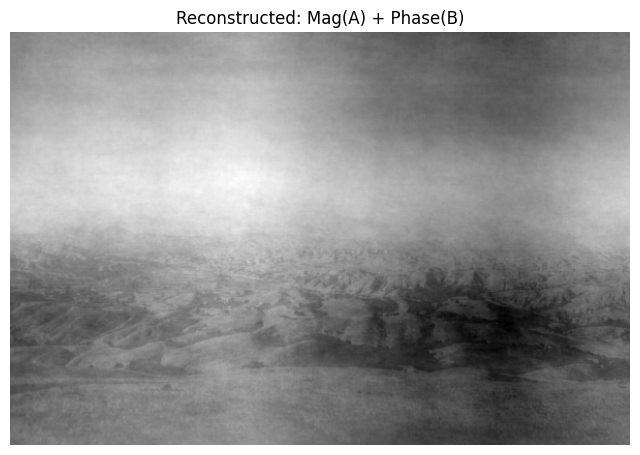

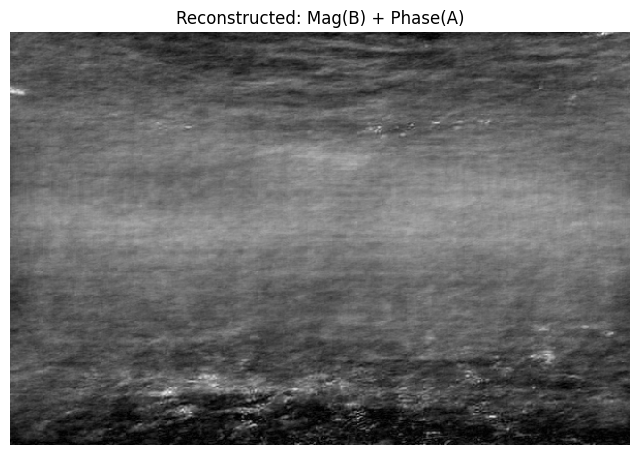